In [ ]:
#!pip install missingno

In [1]:
import pandas as pd
import glob, os
import numpy as np
import matplotlib.pyplot as plt
import datetime  as dt
import missingno as msno

In [2]:
ls crime_data_raw/2013

apr13.xls*  dec13.xls*  jan13.xls*  jun13.xls*  may13.xls*  oct13.xls*
aug13.xls*  feb13.xls*  jul13.xls*  mar13.xls*  nov13.xls*  sep13.xls*


In [3]:
path = 'crime_data_raw/2013'

In [4]:
ls crime_data_raw/

10years/    2006/  2009/  2012/  2015/  premise_codes.csv*
1985_2014/  2007/  2010/  2013/  2016/  Untitled Folder/
2005/       2008/  2011/  2014/  2017/


In [5]:
# get premise codes

pc = pd.read_csv('crime_data_raw/premise_codes.csv')
pc.head()

,Premise Type,Premise Description
0,01A,AIRPORT TERMINAL
1,01B,BUS STATION
2,01K,RAILROAD TRACK/RIGHT OF WAY
3,01P,PARK & RIDE TERMINAL
4,01R,LIGHT RAIL VEHICLE


In [6]:
# rename premise column for easy merge
pc.rename(columns={'Premise Type': 'Premise',}, inplace=True)
pc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 2 columns):
Premise                126 non-null object
Premise Description    126 non-null object
dtypes: object(2)
memory usage: 2.0+ KB


In [7]:
# combine all files into one df
all_files = glob.glob(os.path.join(path, "*.xls")) 

df_from_each_file = (pd.read_excel(f) for f in all_files)
df   = pd.concat(df_from_each_file, ignore_index=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130459 entries, 0 to 130458
Data columns (total 11 columns):
# Of Offenses    130459 non-null int64
Beat             130459 non-null object
Block Range      130459 non-null object
Date             130459 non-null datetime64[ns]
Hour             130459 non-null int64
Offense Type     130459 non-null object
Premise          130459 non-null object
Street Name      130459 non-null object
Suffix           130459 non-null object
Type             130459 non-null object
Unnamed: 1       0 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 10.9+ MB


In [10]:
df.Date.unique()

array(['2013-04-25T00:00:00.000000000', '2013-04-14T00:00:00.000000000',
       '2013-04-02T00:00:00.000000000', '2013-04-19T00:00:00.000000000',
       '2013-04-23T00:00:00.000000000', '2012-07-02T00:00:00.000000000',
       '2013-04-11T00:00:00.000000000', '2013-04-03T00:00:00.000000000',
       '2013-04-17T00:00:00.000000000', '2013-04-29T00:00:00.000000000',
       '2013-04-21T00:00:00.000000000', '2013-04-18T00:00:00.000000000',
       '2013-04-13T00:00:00.000000000', '2013-04-27T00:00:00.000000000',
       '2013-04-05T00:00:00.000000000', '2013-04-08T00:00:00.000000000',
       '2013-04-28T00:00:00.000000000', '2013-04-20T00:00:00.000000000',
       '2013-04-06T00:00:00.000000000', '2013-04-01T00:00:00.000000000',
       '2005-01-01T00:00:00.000000000', '2010-05-01T00:00:00.000000000',
       '2011-10-16T00:00:00.000000000', '2013-04-16T00:00:00.000000000',
       '2013-03-23T00:00:00.000000000', '2013-04-15T00:00:00.000000000',
       '2013-03-18T00:00:00.000000000', '2013-04-22

In [11]:
df[df.Date.isnull()]

,# Of Offenses,Beat,Block Range,Date,Hour,Offense Type,Premise,Street Name,Suffix,Type,Unnamed: 1


## Inspect Premise col

In [12]:
len(df.Premise.value_counts(dropna=False))

127

In [14]:
df.Premise.value_counts(dropna=False).head()

20R    16499
20A    15958
18A    14756
13R     9713
20D     8486
Name: Premise, dtype: int64

In [15]:
df.Premise.unique()

array(['13R', '18A', '20A', '190', '250', '20D', '20R', '13S', '09H',
       '05L', '18C', '05T', '11R', '18G', '140', '20C', '20P', '18R',
       '02S', '18T', '05Z', '120', '05B', '13H', '02B', '18P', '18O',
       '080', '070', '20G', '05Q', '13B', '23S', '03B', '22H', '18N',
       '210', '03S', '11L', '01B', '13A', '05E', '240', '22E', '100',
       '05D', '24J', '18U', '05C', '02C', '20N', '18W', '18M', '05M',
       '05F', '22M', '24E', '20L', '170', '24A', '09D', '24C', '18B',
       '01A', '05W', '---', '11S', '22P', '05G', '06', '05O', '18L',
       '060', '05N', '18S', '05S', '040', '20W', '20V', '20M', '20H',
       '22D', '09P', '19V', '21V', '05R', '05X', '24P', '24G', '11G',
       '24F', '05H', '05Y', '12V', '01P', '18H', '05V', '05P', '24S',
       '22U', '22V', '11P', '11F', '22C', '24T', '01T', '18D', '09R',
       '150', '11C', '25R', '24B', 'N', '05U', '09V', '04V', '01K', '05A',
       '24V', '160', '14V', '13T', '25V', '11V', '01R', '24M', '13C'],
      dtype=obj

In [16]:
df.Premise = df.Premise.str.strip()

In [17]:
len(df.Premise.value_counts(dropna=False))

127

In [18]:
df.Premise.value_counts(dropna=False).head()

20R    16499
20A    15958
18A    14756
13R     9713
20D     8486
Name: Premise, dtype: int64

In [19]:
# check if  null values
df.isnull().values.any().any()

True

In [20]:
# check su, of null values
df.isnull().values.sum()

130459

In [21]:
len(df[df.isnull().any(axis=1)])

130459

## Visualize our data

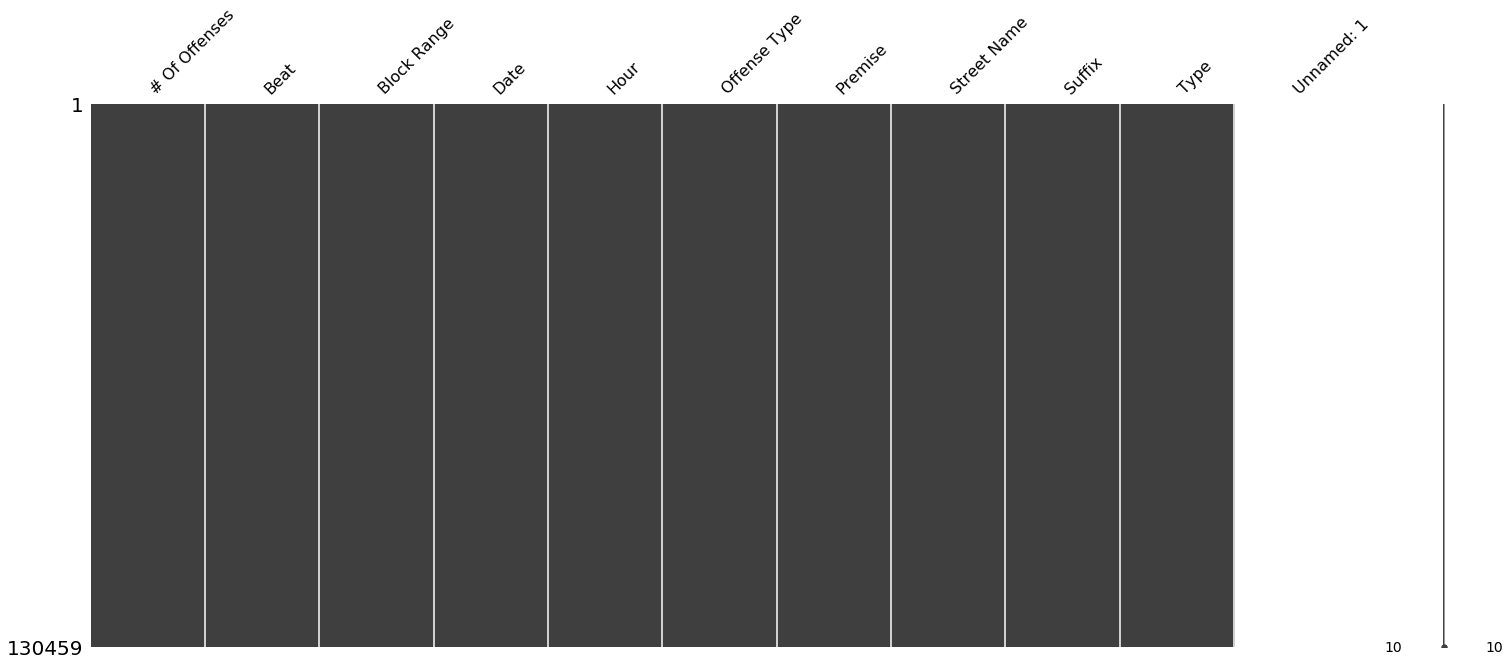

In [22]:
#data = df.replace("nan", np.nan)


sorted_data = msno.nullity_sort(df, sort='descending')
msno.matrix(sorted_data)

## col cleaning

- joining similar columns
- renaming

In [ ]:
df.head()

In [ ]:
# # 2014
# # if duplicate columns

# df['BlockRange'] = pd.concat([df['Block Range'].dropna(),
#                               df['BlockRange'].dropna()]).reindex_like(df)

# df['StreetName'] = pd.concat([df['Street Name'].dropna(),
#                               df['StreetName'].dropna()]).reindex_like(df)

# df['# Of Offenses'] = pd.concat([df['# Of'].dropna(),
#                               df['# Of Offenses'].dropna(),
#                               df['# offenses'].dropna(),
#                               df['# Offenses'].dropna()]).reindex_like(df)

In [23]:
df.head()

,# Of Offenses,Beat,Block Range,Date,Hour,Offense Type,Premise,Street Name,Suffix,Type,Unnamed: 1
0,1,19G10,9400-9499,2013-04-25,5,Murder,13R,WOODFAIR,-,DR,NaN
1,1,17E40,6100-6199,2013-04-14,0,Murder,18A,BELLFORT,W,ST,NaN
2,1,20G10,9900-9999,2013-04-02,16,Murder,20A,RICHMOND,-,AVE,NaN
3,1,2A20,1300-1399,2013-04-19,22,Murder,13R,29TH,E,ST,NaN
4,1,1A10,500-599,2013-04-23,0,Murder,190,RUSK,-,-,NaN


In [ ]:
# df.rename(columns={
#     '# Of Offenses': 'NumOffenses',
#      'Offense Type': 'OffenseType',
# }, inplace=True)
# df.info()

In [24]:
df.rename(columns={
    '# Of Offenses': 'NumOffenses',
     'Offense Type': 'OffenseType',
    'Block Range': 'BlockRange',
    'Street Name': 'StreetName'
}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130459 entries, 0 to 130458
Data columns (total 11 columns):
NumOffenses    130459 non-null int64
Beat           130459 non-null object
BlockRange     130459 non-null object
Date           130459 non-null datetime64[ns]
Hour           130459 non-null int64
OffenseType    130459 non-null object
Premise        130459 non-null object
StreetName     130459 non-null object
Suffix         130459 non-null object
Type           130459 non-null object
Unnamed: 1     0 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 10.9+ MB


## Subset dataframe to work on 

In [25]:
crimes = df[['Date','Beat','BlockRange','StreetName','OffenseType','Premise','NumOffenses','Hour']]
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130459 entries, 0 to 130458
Data columns (total 8 columns):
Date           130459 non-null datetime64[ns]
Beat           130459 non-null object
BlockRange     130459 non-null object
StreetName     130459 non-null object
OffenseType    130459 non-null object
Premise        130459 non-null object
NumOffenses    130459 non-null int64
Hour           130459 non-null int64
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 8.0+ MB


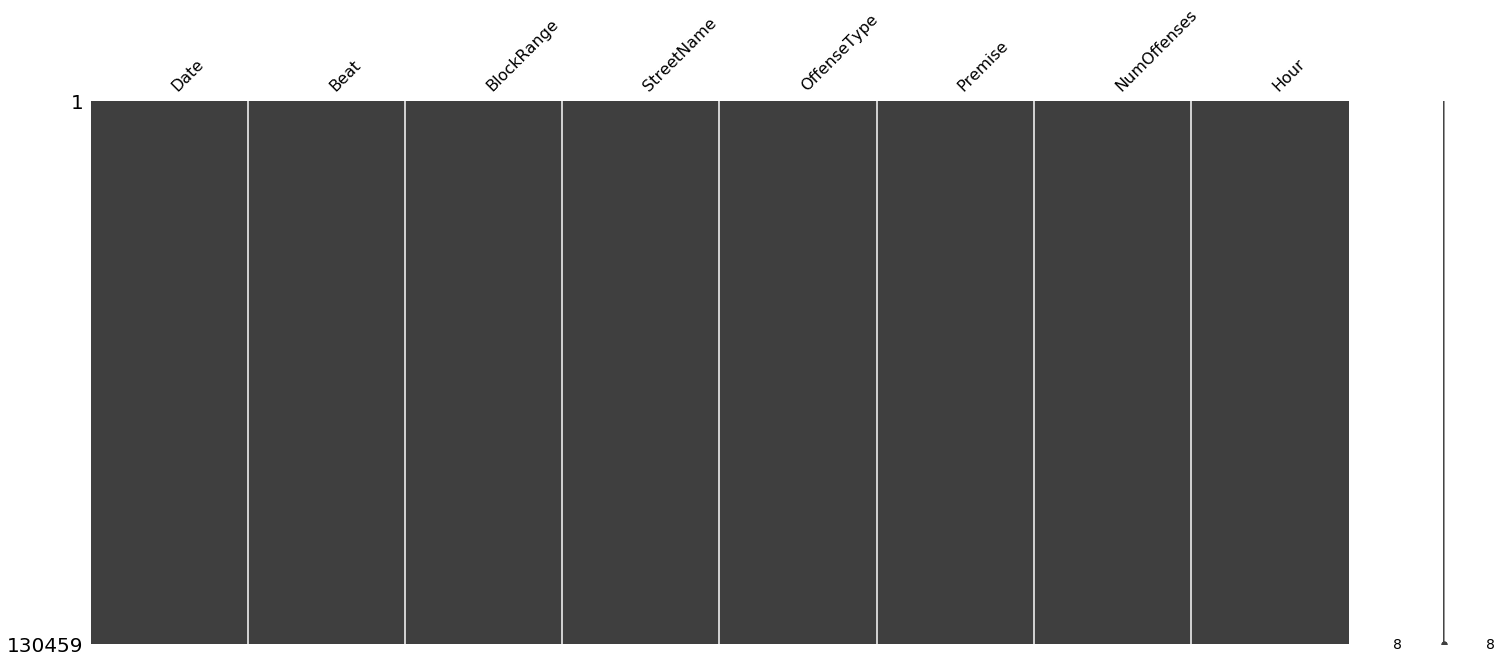

In [26]:

sorted_data = msno.nullity_sort(crimes, sort='descending')
msno.matrix(sorted_data)

# FIND NAN onevery col

In [27]:
len(crimes[crimes.Date.isnull()])

0

In [28]:
crimes[crimes.Date.isnull()]

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour


In [29]:
len(crimes[crimes.Beat.isnull()])

0

In [30]:
crimes[crimes.Beat.isnull()]

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour


In [31]:
len(crimes[crimes.BlockRange.isnull()])

0

In [32]:
crimes[crimes.BlockRange.isnull()]

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour


In [33]:
len(crimes[crimes.StreetName.isnull()])

0

In [34]:
crimes[crimes.StreetName.isnull()]

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour


In [35]:
len(crimes[crimes.OffenseType.isnull()])

0

In [36]:
crimes[crimes.OffenseType.isnull()]

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour


In [37]:
len(crimes[crimes.Premise.isnull()])

0

In [38]:
crimes[crimes.Premise.isnull()]

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour


In [39]:
len(crimes[crimes.NumOffenses.isnull()])

0

In [40]:
crimes[crimes.NumOffenses.isnull()]

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour


In [41]:
len(crimes[crimes.Hour.isnull()])

0

In [42]:
crimes[crimes.Hour.isnull()]

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour


## Find NaN
- drop if > 2 nan

In [43]:
len(crimes[crimes.isnull().any(axis=1)])

0

In [44]:
crimes[crimes.isnull().any(axis=1)]

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour


In [ ]:
#crimes = crimes.dropna(thresh=2)

In [ ]:
#crimes[crimes.isnull().any(axis=1)]

## Joint dataframes

In [45]:
# join two datarames
crimes = pd.merge(crimes, pc, on='Premise', how='outer')
crimes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130461 entries, 0 to 130460
Data columns (total 9 columns):
Date                   130459 non-null datetime64[ns]
Beat                   130459 non-null object
BlockRange             130459 non-null object
StreetName             130459 non-null object
OffenseType            130459 non-null object
Premise                130461 non-null object
NumOffenses            130459 non-null float64
Hour                   130459 non-null float64
Premise Description    129358 non-null object
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 10.0+ MB


In [46]:
crimes.head()

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description
0,2013-04-25,19G10,9400-9499,WOODFAIR,Murder,13R,1.0,5.0,ROAD/STREET/SIDEWALK
1,2013-04-19,2A20,1300-1399,29TH,Murder,13R,1.0,22.0,ROAD/STREET/SIDEWALK
2,2013-04-18,14D20,4000-4099,REDBUD,Murder,13R,1.0,21.0,ROAD/STREET/SIDEWALK
3,2013-04-20,2A60,1900-1999,ELLA,Rape,13R,1.0,20.0,ROAD/STREET/SIDEWALK
4,2013-04-06,2A50,4200-4299,KOEHLER,Rape,13R,1.0,4.0,ROAD/STREET/SIDEWALK


In [47]:
len(crimes[crimes['Premise Description'].isnull()])

1103

In [48]:
crimes[crimes['Premise Description'].isnull()].head()

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description
124086,2013-04-24,12D40,11800-11899,TEANECK,Aggravated Assault,---,1.0,22.0,NaN
124087,2013-04-22,1A20,500-599,SUL ROSS,Aggravated Assault,---,1.0,16.0,NaN
124088,2013-04-19,7C20,3500-3599,LOCKWOOD,Aggravated Assault,---,1.0,15.0,NaN
124089,2013-04-02,18F50,9200-9299,RICHMOND,Aggravated Assault,---,1.0,20.0,NaN
124090,2013-04-03,16E20,13300-13399,HIRAM CLARKE,Aggravated Assault,---,1.0,7.0,NaN


## Problem
- find nan values on one col, and copy related col

In [49]:
crimes.Premise.unique()

array(['13R', '18A', '20A', '190', '250', '20D', '20R', '13S', '09H',
       '05L', '18C', '05T', '11R', '18G', '140', '20C', '20P', '18R',
       '02S', '18T', '05Z', '120', '05B', '13H', '02B', '18P', '18O',
       '080', '070', '20G', '05Q', '13B', '23S', '03B', '22H', '18N',
       '210', '03S', '11L', '01B', '13A', '05E', '240', '22E', '100',
       '05D', '24J', '18U', '05C', '02C', '20N', '18W', '18M', '05M',
       '05F', '22M', '24E', '20L', '170', '24A', '09D', '24C', '18B',
       '01A', '05W', '---', '11S', '22P', '05G', '06', '05O', '18L',
       '060', '05N', '18S', '05S', '040', '20W', '20V', '20M', '20H',
       '22D', '09P', '19V', '21V', '05R', '05X', '24P', '24G', '11G',
       '24F', '05H', '05Y', '12V', '01P', '18H', '05V', '05P', '24S',
       '22U', '22V', '11P', '11F', '22C', '24T', '01T', '18D', '09R',
       '150', '11C', '25R', '24B', 'N', '05U', '09V', '04V', '01K', '05A',
       '24V', '160', '14V', '13T', '25V', '11V', '01R', '24M', '13C',
       '02V', '1

In [50]:
len(crimes[crimes['Premise'] == '---'])

1019

In [51]:
len(crimes[crimes['Premise'] == 'N'])

41

In [ ]:
crimes[crimes['Premise'] == 'N']

In [52]:
crimes.loc[crimes['Premise Description'].isnull(),'Premise Description'] = crimes['Premise']

In [53]:
len(crimes[crimes['Premise Description'].isnull()])

0

In [55]:
crimes[crimes['Premise'] == 'N'].head()


,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description
130268,2013-04-29,12D10,9800-9899,JENNIFER WAY,Theft,N,1.0,12.0,N
130269,2013-08-25,3B50,5300-5399,NORTH,Burglary,N,1.0,2.0,N
130270,2013-08-25,2A10,1700-1799,COMMON,Aggravated Assault,N,1.0,4.0,N
130271,2013-08-06,1A30,1800-1899,ALABAMA,Theft,N,1.0,21.0,N
130272,2013-08-13,2A50,5100-5199,MAXIE,Theft,N,1.0,20.0,N


## Visualize data

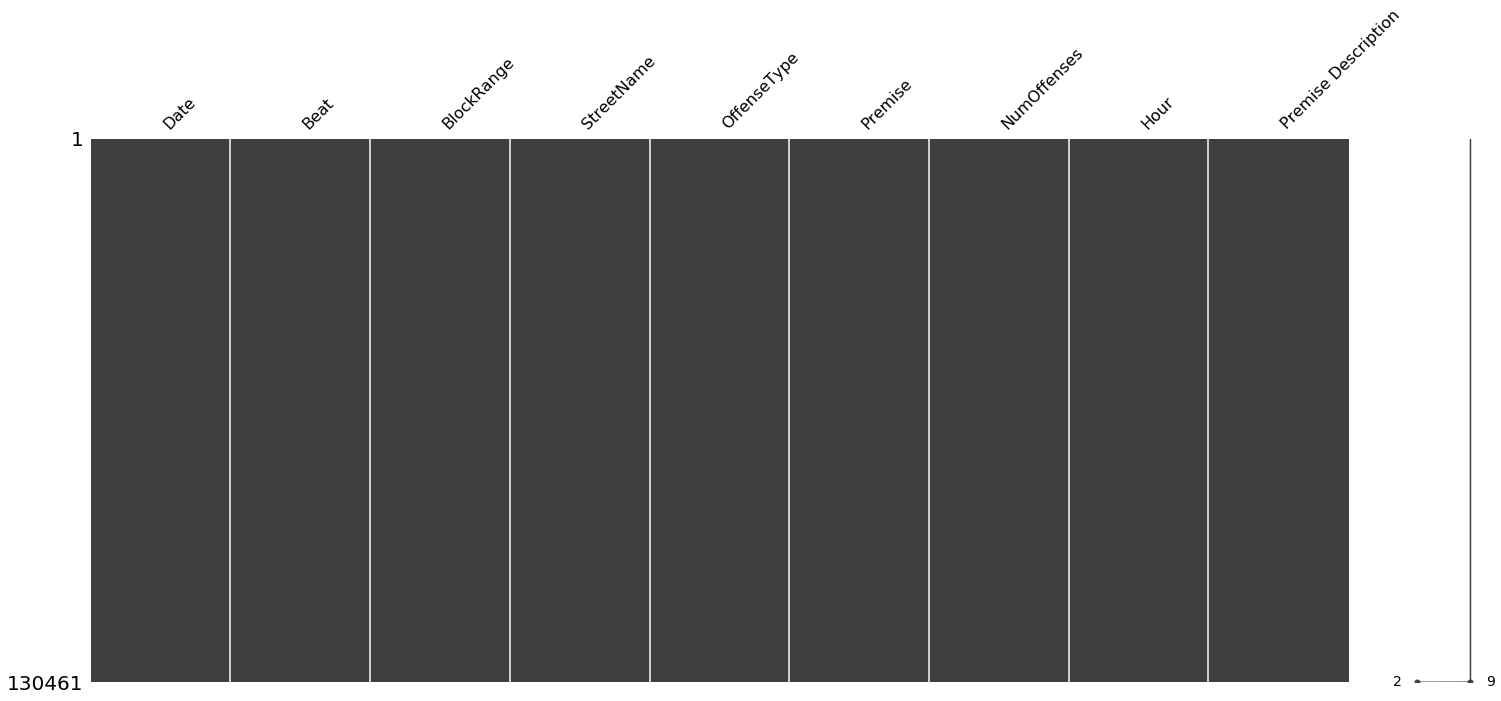

In [56]:
sorted_data = msno.nullity_sort(crimes, sort='descending')
msno.matrix(sorted_data)

## Display any null values

In [57]:
len(crimes[crimes.isnull().any(axis=1)])

2

In [58]:
crimes[crimes.isnull().any(axis=1)].tail()

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description
130459,NaT,NaN,NaN,NaN,NaN,02V,NaN,NaN,VACANT BANK
130460,NaT,NaN,NaN,NaN,NaN,15V,NaN,NaN,VACANT JAIL/PRISON


## drop rows with 2 or 3 or more NaN

In [59]:
crimes = crimes.dropna(thresh=3)

In [60]:
len(crimes[crimes.isnull().any(axis=1)])

0

In [61]:
crimes[crimes.isnull().any(axis=1)].tail()

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description


## Inspect each column

In [62]:
crimes.dtypes

Date                   datetime64[ns]
Beat                           object
BlockRange                     object
StreetName                     object
OffenseType                    object
Premise                        object
NumOffenses                   float64
Hour                          float64
Premise Description            object
dtype: object

## Beat

In [63]:
len(crimes.Beat.value_counts())

120

In [64]:
len(crimes.Beat.value_counts(dropna=False))

120

In [65]:
crimes.Beat.unique()

array(['19G10', '2A20', '14D20', '2A60', '2A50', '19G20', '6B40', '8C10',
       '17E30', '16E10', '9C40', '17E20', '7C10', '1A10', '8C40', '14D10',
       '10H40', '10H50', '13D20', '3B10', '10H60', '3B50', '1A20',
       '20G10', '6B60', '17E10', '15E20', '20G30', '16E20', '2A10',
       '18F40', '19G30', '7C30', '20G70', '16E30', '18F50', '17E40',
       '20G40', '6B10', '11H30', '20G20', '14D30', '7C20', '3B40',
       '15E30', '18F30', '10H20', '6B20', '6B30', '11H10', '6B50', '5F20',
       '1A30', '8C20', '2A30', '12D10', '19G50', '19G40', '13D10',
       '10H10', '5F30', '12D70', '20G60', '14D40', '24C30', '5F40',
       '1A40', '16E40', '3B30', '11H20', '8C60', '10H30', '9C30', '9C20',
       '13D40', '8C30', '7C40', '8C50', '10H80', '12D50', '24C10',
       '10H70', '9C10', '18F60', '4F10', '4F20', '11H50', '12D30', '1A50',
       '20G80', '18F10', '7C50', '18F20', '12D20', '20G50', '2A40',
       '24C40', 'UNK', '5F10', '21I50', '15E40', '12D60', '11H40',
       '15E10', '12

In [66]:
# replace extra ' with empty space
crimes['Beat'] = crimes.Beat.str.replace("'", " ")

In [67]:
len(crimes.Beat.value_counts(dropna=False))

120

In [68]:
# strip empty spaces
crimes.Beat = crimes.Beat.str.strip()

In [69]:
len(crimes.Beat.value_counts(dropna=False))  # get the total

120

In [70]:
crimes.Beat.unique()

array(['19G10', '2A20', '14D20', '2A60', '2A50', '19G20', '6B40', '8C10',
       '17E30', '16E10', '9C40', '17E20', '7C10', '1A10', '8C40', '14D10',
       '10H40', '10H50', '13D20', '3B10', '10H60', '3B50', '1A20',
       '20G10', '6B60', '17E10', '15E20', '20G30', '16E20', '2A10',
       '18F40', '19G30', '7C30', '20G70', '16E30', '18F50', '17E40',
       '20G40', '6B10', '11H30', '20G20', '14D30', '7C20', '3B40',
       '15E30', '18F30', '10H20', '6B20', '6B30', '11H10', '6B50', '5F20',
       '1A30', '8C20', '2A30', '12D10', '19G50', '19G40', '13D10',
       '10H10', '5F30', '12D70', '20G60', '14D40', '24C30', '5F40',
       '1A40', '16E40', '3B30', '11H20', '8C60', '10H30', '9C30', '9C20',
       '13D40', '8C30', '7C40', '8C50', '10H80', '12D50', '24C10',
       '10H70', '9C10', '18F60', '4F10', '4F20', '11H50', '12D30', '1A50',
       '20G80', '18F10', '7C50', '18F20', '12D20', '20G50', '2A40',
       '24C40', 'UNK', '5F10', '21I50', '15E40', '12D60', '11H40',
       '15E10', '12

In [71]:
crimes.Beat.value_counts(dropna=False).head()

12D10    2787
19G10    2777
1A20     2651
13D20    2607
6B60     2589
Name: Beat, dtype: int64

## BlockRange

In [72]:
len(crimes.BlockRange.value_counts(dropna=False))

249

In [73]:
crimes.BlockRange.value_counts(dropna=False).head()

100-199      1879
900-999      1783
9500-9599    1607
700-799      1503
9400-9499    1485
Name: BlockRange, dtype: int64

In [74]:
# strip
crimes.BlockRange = crimes.BlockRange.str.strip()

In [75]:
len(crimes.BlockRange.value_counts(dropna=False))

249

## StreetName

In [76]:
print('before:{}'.format(len(crimes.StreetName.value_counts(dropna=False))))

before:7540


In [77]:
crimes.StreetName = crimes.StreetName.str.strip()

In [78]:
print('after:{}'.format(len(crimes.StreetName.value_counts(dropna=False))))

after:7540


In [79]:
print(crimes.StreetName.value_counts(dropna=False).head())

WESTHEIMER    3824
GULF          2035
GESSNER       1925
RICHMOND      1726
NORTH         1679
Name: StreetName, dtype: int64


## OffenseType

In [80]:
print('before:{}'.format(len(crimes.OffenseType.value_counts(dropna=False))))

before:7


In [81]:
crimes.OffenseType = crimes.OffenseType.str.strip()

In [82]:
print('after:{}'.format(len(crimes.OffenseType.value_counts(dropna=False))))

after:7


In [83]:
print(crimes.OffenseType.value_counts(dropna=False))

Theft                 73591
Burglary              23733
Auto Theft            13147
Robbery                9891
Aggravated Assault     9274
Rape                    614
Murder                  209
Name: OffenseType, dtype: int64


## Premise

In [84]:
print('before:{}'.format(len(crimes.Premise.value_counts(dropna=False))))

before:127


In [85]:
crimes.Premise = crimes.Premise.str.strip()

In [86]:
print('after:{}'.format(len(crimes.Premise.value_counts(dropna=False))))

after:127


In [87]:
crimes.Premise.value_counts(dropna=False).head()

20R    16499
20A    15958
18A    14756
13R     9713
20D     8486
Name: Premise, dtype: int64

## Premise Description

In [88]:
print('before:{}'.format(len(crimes['Premise Description'].value_counts(dropna=False))))

before:127


In [89]:
#crimes.Beat = crimes.Beat.str.replace(r"\'(.+?)\'", ' ')
crimes['Premise Description'] = crimes['Premise Description'].str.strip()

In [90]:
print('after:{}'.format(len(crimes['Premise Description'].value_counts(dropna=False))))

after:127


In [91]:
print(crimes['Premise Description'].value_counts(dropna=False).head())

RESIDENCE/HOUSE          16499
APARTMENT                15958
APARTMENT PARKING LOT    14756
ROAD/STREET/SIDEWALK      9713
DRIVEWAY                  8486
Name: Premise Description, dtype: int64


# Set Date as index

In [92]:
# date
crimes.Date = pd.to_datetime(crimes.Date)

crimes = crimes.set_index('Date').sort_index(ascending=True)

In [93]:
crimes.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description
Date,,,,,,,,
1963-02-02,10H40,3800-3899,MAIN,Theft,09R,1.0,13.0,REHABILITATION CENTER
1972-06-01,12D50,16400-16499,BROOKVILLA,Rape,20R,1.0,0.0,RESIDENCE/HOUSE
1972-07-15,14D30,5300-5399,NORTHRIDGE,Burglary,---,1.0,20.0,---
1977-10-14,10H50,3200-3299,TRUXILLO,Theft,18A,1.0,15.0,APARTMENT PARKING LOT
1979-07-01,11H10,100-199,EASTGATE,Rape,20R,1.0,0.0,RESIDENCE/HOUSE


## Create Columns with day,weekday,month,year from date index

In [94]:
# get day, weekday,month ,year

crimes['day'] = crimes.index.strftime('%d')
crimes['weekday'] = crimes.index.strftime('%A')
crimes['month'] = crimes.index.strftime('%b')
crimes['year'] = crimes.index.strftime('%Y')

In [95]:
crimes.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description,day,weekday,month,year
Date,,,,,,,,,,,,
1963-02-02,10H40,3800-3899,MAIN,Theft,09R,1.0,13.0,REHABILITATION CENTER,02,Saturday,Feb,1963
1972-06-01,12D50,16400-16499,BROOKVILLA,Rape,20R,1.0,0.0,RESIDENCE/HOUSE,01,Thursday,Jun,1972
1972-07-15,14D30,5300-5399,NORTHRIDGE,Burglary,---,1.0,20.0,---,15,Saturday,Jul,1972
1977-10-14,10H50,3200-3299,TRUXILLO,Theft,18A,1.0,15.0,APARTMENT PARKING LOT,14,Friday,Oct,1977
1979-07-01,11H10,100-199,EASTGATE,Rape,20R,1.0,0.0,RESIDENCE/HOUSE,01,Sunday,Jul,1979


## null values

- check
- count
- display

In [96]:
crimes.isnull().values.any().any()

False

In [97]:
# display any null

len(crimes[crimes.isnull().any(axis=1)])

0

In [98]:
crimes[crimes.isnull().any(axis=1)]

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description,day,weekday,month,year
Date,,,,,,,,,,,,


In [99]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 130459 entries, 1963-02-02 to 2033-04-21
Data columns (total 12 columns):
Beat                   130459 non-null object
BlockRange             130459 non-null object
StreetName             130459 non-null object
OffenseType            130459 non-null object
Premise                130459 non-null object
NumOffenses            130459 non-null float64
Hour                   130459 non-null float64
Premise Description    130459 non-null object
day                    130459 non-null object
weekday                130459 non-null object
month                  130459 non-null object
year                   130459 non-null object
dtypes: float64(2), object(10)
memory usage: 15.4+ MB


## New Dataframe
- remove premise col
- keep premise description

In [100]:
crime_yr = crimes[['Beat','BlockRange','StreetName','OffenseType','Premise Description','NumOffenses','Hour','day','weekday','month','year']]
crime_yr.head()

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
1963-02-02,10H40,3800-3899,MAIN,Theft,REHABILITATION CENTER,1.0,13.0,02,Saturday,Feb,1963
1972-06-01,12D50,16400-16499,BROOKVILLA,Rape,RESIDENCE/HOUSE,1.0,0.0,01,Thursday,Jun,1972
1972-07-15,14D30,5300-5399,NORTHRIDGE,Burglary,---,1.0,20.0,15,Saturday,Jul,1972
1977-10-14,10H50,3200-3299,TRUXILLO,Theft,APARTMENT PARKING LOT,1.0,15.0,14,Friday,Oct,1977
1979-07-01,11H10,100-199,EASTGATE,Rape,RESIDENCE/HOUSE,1.0,0.0,01,Sunday,Jul,1979


In [101]:
crime_yr.isnull().values.any().any()

False

In [102]:
# display any null

len(crime_yr[crime_yr.isnull().any(axis=1)])

0

In [103]:
crime_yr[crime_yr.isnull().any(axis=1)]

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,


# FIND NANS

## INDEX

In [104]:
len(crime_yr[crime_yr.index.isnull()])

0

In [105]:
crime_yr[crime_yr.index.isnull()]

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,


In [ ]:
# drop index nans
crime_yr.index.dropna(how='any')

In [ ]:
len(crime_yr[crime_yr.index.isnull()])

## Beat

In [106]:
len(crime_yr[crime_yr.Beat.isnull()])

0

In [107]:
crime_yr[crime_yr.Beat.isnull()].head()

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,


In [ ]:
crime_yr.Beat = crime_yr.Beat.replace(np.nan, 'UNK')

In [ ]:
len(crime_yr[crime_yr.Beat.isnull()])

In [ ]:
crime_yr[crime_yr.Beat.isnull()]

## BlockRAnge

In [108]:
len(crime_yr[crime_yr.BlockRange.isnull()])

0

In [109]:
crime_yr[crime_yr.BlockRange.isnull()].head()

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,


## StreetName

In [110]:
len(crime_yr[crime_yr.StreetName.isnull()])

0

In [111]:
crime_yr[crime_yr.StreetName.isnull()].head()

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,


## OffenseType

In [112]:
len(crime_yr[crime_yr.OffenseType.isnull()])

0

In [113]:
crime_yr[crime_yr.OffenseType.isnull()]

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,


## Hour

In [114]:
len(crime_yr[crime_yr.Hour.isnull()])

0

In [115]:
crime_yr[crime_yr.Hour.isnull()].head()

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,


## Premsie Description

In [116]:
len(crime_yr[crime_yr['Premise Description'].isnull()])

0

In [117]:
crime_yr[crime_yr['Premise Description'].isnull()].head()

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,


In [ ]:
crime_yr['Premise Description'] = crime_yr['Premise Description'].replace(np.nan, 'No label')

In [ ]:
len(crime_yr[crime_yr['Premise Description'].isnull()])

In [ ]:
crime_yr[crime_yr['Premise Description'].isnull()]

In [118]:
# display any null

len(crime_yr[crime_yr.isnull().any(axis=1)])

0

In [119]:
crime_yr[crime_yr.isnull().any(axis=1)]

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,


## Save

In [120]:
# change column name from Premise Descriptionto Premise

crime_yr.rename(columns={
    'Premise Description': 'Premise',}, inplace=True)
crime_yr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 130459 entries, 1963-02-02 to 2033-04-21
Data columns (total 11 columns):
Beat           130459 non-null object
BlockRange     130459 non-null object
StreetName     130459 non-null object
OffenseType    130459 non-null object
Premise        130459 non-null object
NumOffenses    130459 non-null float64
Hour           130459 non-null float64
day            130459 non-null object
weekday        130459 non-null object
month          130459 non-null object
year           130459 non-null object
dtypes: float64(2), object(9)
memory usage: 11.9+ MB


/home/salas/miniconda3/envs/springboard/lib/python3.6/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [121]:
crime_yr.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
1963-02-02,10H40,3800-3899,MAIN,Theft,REHABILITATION CENTER,1.0,13.0,02,Saturday,Feb,1963
1972-06-01,12D50,16400-16499,BROOKVILLA,Rape,RESIDENCE/HOUSE,1.0,0.0,01,Thursday,Jun,1972
1972-07-15,14D30,5300-5399,NORTHRIDGE,Burglary,---,1.0,20.0,15,Saturday,Jul,1972
1977-10-14,10H50,3200-3299,TRUXILLO,Theft,APARTMENT PARKING LOT,1.0,15.0,14,Friday,Oct,1977
1979-07-01,11H10,100-199,EASTGATE,Rape,RESIDENCE/HOUSE,1.0,0.0,01,Sunday,Jul,1979


In [122]:
ls crime_data_clean/new

crime10_clean.csv*  crime12_clean.csv*  crime14_clean.csv*
crime11_clean.csv*  crime13_clean.csv*


In [123]:
crime_yr.to_csv('crime_data_clean/new/crime13_clean.csv')

In [124]:
ls crime_data_clean/new

crime10_clean.csv*  crime12_clean.csv*  crime14_clean.csv*
crime11_clean.csv*  crime13_clean.csv*
